In [1]:
%matplotlib inline

# Behavioural analyses

<big>This notebook includes code and instructions to re-generate figures included in the Data Descriptor article for the CNeuroMod-THINGS dataset. These figures feature distributions of delays between image repetitions, as well as memory performance scores like recognition accuracy and reaction time.</big>

<br/>

**The code below generates the following figures and sub-figures from the datapaper:**

* **Fig. 1c**, distribution of delays between image repetitions (in days and seconds)
* **Fig. 3**, distribution of "seen" and "unseen" responses per subcondition
* **Fig. 4a**, reaction time per response type (hits, misses, false alarms and correct rejections)

<br/>

---

# 0 | Installation

### Note:
If you are following these instructiuons on Github, we recommend that you view this Notebook through [https://nbviewer.org](https://nbviewer.org/github/courtois-neuromod/cneuromod-things/blob/main/datapaper/notebooks/behav_analysis.ipynb) for a more accurate rendering and improved readability. 

### 0.1 | Install required Python libraries
To run this Notebook and re-create figures, you need to install the following Python libraries (e.g., inside a virtual environment). 

```shell
jupyterlab==4.3.8
numpy==1.24.4
pandas==2.0.3
matplotlib==3.7.5
matplotlib-inline==0.1.7
```
<br/>

---

### 0.2 | Install the CNeuroMod-THINGS dataset

To generate figures, you need to download a few files from the CNeuroMod-THINGS dataset. 

Use the DataLad software (version > 1.0.0, https://www.datalad.org/) to clone the `cneuromod-things` repository. 
DataLad is a versionning tool to manage large data structures organized in git repositories available for Linux, OSX and Windows. 

Note: the command below installs **symbolic links without downloading heavy files** onto your local machine.

```bash
datalad clone git@github.com:courtois-neuromod/cneuromod-things.git
```
<br/>

---


### 0.3 | Pull the data files needed to generate figures

Before you can run this Notebook, you need to **download a few input files** onto your local machine. 

Inside the newly cloned `cneuromod-things` repository, navigate to `cneuromod-things/THINGS/behaviour`, which is a submodule inside the main repository. Upon installation, the `behaviour` submodule will appear empty. 

```bash
cd cneuromod-things/THINGS/behaviour
ls
```
<br/>

Use DataLad to download the `behaviour` submodule's symbolic links (**no large files will be pulled**).

```bash
datalad get *
ls
```
<br/>

Then, use DataLad again to download only the files you need onto your local machine.

```bash
datalad get sub-*/beh/sub-*_task-things_desc-perTrial_annotation.tsv
datalad get sub-*/beh/sub-*_task-things_desc-perSession_beh.tsv
```
<br/>

##### Note: 
The behavioural analyses we report are derived from the **first key press** (subject response) logged for a given trial. If you wish to plot performance metrics derived from the **last logged key press** instead (to account for response self-correction), you can **pull and use the following files**: 
```bash
datalad get sub-*/beh/sub-*_task-things_desc-perSessionLKP_beh.tsv`
```
<br/>

---
### 0.4 | Launch the Jupyter Notebook

Inside `cneuromod-things`, navigate to the tutorial section, and open the current Notebook (behav_analysis.ipynb, e.g., inside jupyterlab)
```bash
cd cneuromod-things/datapaper/notebooks
jupyter lab
```
<br/>


---
# 1 | Import Python libraries

Run the code below to import Python libraries.

In [2]:
import glob
from pathlib import Path

import numpy as np
from numpy import nan as NaN
import pandas as pd
import matplotlib.pyplot as plt 

print('numpy version: ', np.__version__)
print('pandas version: ', pd.__version__)
import matplotlib
print('matplotlib version: ', matplotlib.__version__)

numpy version:  1.24.4
pandas version:  2.0.3
matplotlib version:  3.7.5


---
# 2 | Repetition Delays (Figure 1c)

**Fig. 1c** features the frequency distribution of delays between image repetitions plotted per trial for each subject.

**Top charts**: delays between repetitions in days. Images were either repeated within session (0 days) or between consecutive sessions, most of which were 7 days apart, with a few exceptions due to participant and scanner availability.

**Bottom charts**: delays between repetitions in seconds, for within-session repetitions only. The red vertical line indicates 283s, the duration of a single run, to separate within-run (left of the line) and between-run (right of the line) repetitions.

**Input files**: 
* cneuromod-things/THINGS/behaviour/sub-{s_num}/beh/sub-{s_num}_task-things_desc-perTrial_annotation.tsv

### 2.1 | Set paths and variables



In [3]:
# set save_fig to True to export a .png file of Fig. 1c
save_fig = False

# Resolve relative input and output paths
beh_file_path = Path("../../THINGS/behaviour").resolve()
fig_save_path = Path("../figures").resolve()


### 2.2 | Run the code below to generate Fig. 1c



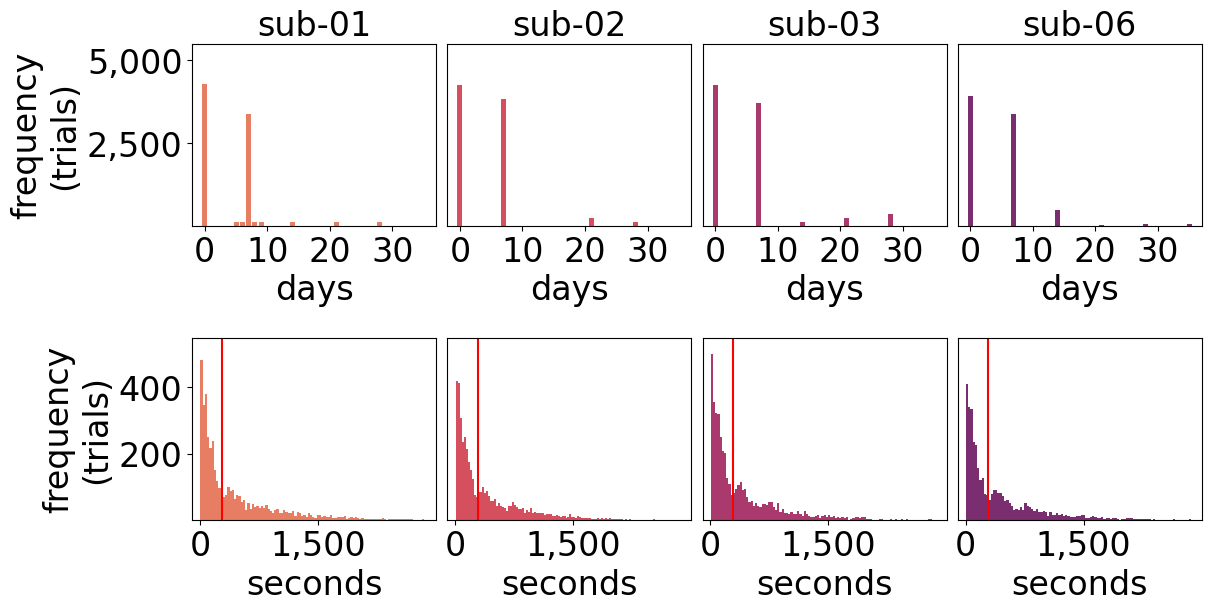

In [4]:

SMALL_SIZE = 8
MEDIUM_SIZE = 24
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

mosaic = """
    ABCD
    ABCD
    ABCD
    ABCD
    ABCD
    ABCD
    ABCD
    ABCD
    ....
    EFGH
    EFGH
    EFGH
    EFGH
    EFGH
    EFGH
    EFGH
    EFGH
    """

fig = plt.figure(constrained_layout=True, figsize=(12, 6))

sub = ['01', '02', '03', '06']
top_idx = ['A', 'B', 'C', 'D']
bottom_idx = ['E', 'F', 'G', 'H']
colors = [
    (0.90732341, 0.4939774, 0.38990532),
    (0.83765537, 0.30784814, 0.3723105),
    (0.66635279, 0.22717328, 0.43008427),
    (0.47936222, 0.18006056, 0.43733022),
]

ax_dict = fig.subplot_mosaic(mosaic)

for i in range(len(sub)):
    s = sub[i]
    top_ref = top_idx[i]
    bottom_ref = bottom_idx[i]
    df = pd.read_csv(
            f"{beh_file_path}/sub-{s}/beh/sub-{s}_task-things_desc-perTrial_annotation.tsv", sep = '\t', low_memory=False)
    
    delay, count = np.unique(df['delay_days'].dropna(), return_counts = True)
    
    ax_dict[top_ref].bar(delay, count, color=colors[i])
    ax_dict[top_ref].set_title(f'sub-{s}')
    ax_dict[top_ref].set_xticks(ticks=[0, 10, 20, 30])
    ax_dict[bottom_ref].set_xticks(ticks=[0, 1500])
    
    if i > 0:
        ax_dict[top_ref].set_yticks(ticks=[])
        ax_dict[top_ref].set_ylabel('')
        ax_dict[bottom_ref].set_yticks(ticks=[])
        ax_dict[bottom_ref].set_ylabel('')

    else:
        ax_dict[top_ref].set_yticks(ticks=[2500, 5000], labels=['2,500', '5,000'])
        ax_dict[top_ref].set_ylabel('frequency\n(trials)')
        ax_dict[bottom_ref].set_yticks(ticks=[200, 400])
        ax_dict[bottom_ref].set_ylabel('frequency\n(trials)')
        
    ax_dict[top_ref].set_xlim(-2, 37)
    ax_dict[top_ref].set_ylim(0, 5500)
    ax_dict[top_ref].set_xlabel('days')
    ax_dict[bottom_ref].set_xlim(-100, 3000)
    ax_dict[bottom_ref].set_xticks(ticks=[0, 1500], labels=['0', '1,500'])
    ax_dict[bottom_ref].set_ylim(0, 550)    
    ax_dict[bottom_ref].set_xlabel('seconds')
    
    df = pd.read_csv(
        f"{beh_file_path}/sub-{s}/beh/sub-{s}_task-things_desc-perTrial_annotation.tsv",
        sep = '\t',
        low_memory=False,
    )
    df = df[~df['delay_seconds'].isna()]
    df = df[df['delay_seconds'] > 0]
    
    ax_dict[bottom_ref].hist(df['delay_seconds'], bins=100, color=colors[i])
    ax_dict[bottom_ref].plot([283, 283], [0, 550], color='red')
    
if save_fig:
    plt.savefig(f'{fig_save_path}/Fig1C_delays_distribution.png', dpi=600)

plt.show()
    

---
# 3 | Recognition Accuracy (Figure 3)

**Fig. 3** features performance metrics per subject for the image recognition task, overall and per sub-condition. 

**On the left**: proportion of “seen” responses for the 1st image presentation (grey; “seen” answers are false alarms), and for the 2nd and 3rd image presentations (purple and green, respectively; “seen” answers are hits). For presentations 2 and 3, response rates are split between images repeated within (w, darker shades) and between (b, paler shades) sessions. Scores are averaged across sessions for each subject; error bars are standard deviations. 

**On the right**: proportion of answer types per image repetition (1st, 2nd and 3rd presentation), averaged across sessions for each subject. Responses include “seen” and “unseen” answers split between low and high confidence (LC and HC). Error bars are standard deviations. For the 2nd and 3rd presentation, results are split between images repeated within (w) and between (b) sessions. “Seen” answers (darker blue: high confidence; pale blue: low confidence) are incorrect一false alarms一for presentation 1, and correct一hits一for presentations 2 and 3. “Unseen” answers (red: high confidence; pink: low confidence) are correct一correct rejections一for presentation 1, and incorrect一misses一for presentations 2 and 3. 

**Input files**: 
* ***cneuromod-things/THINGS/behaviour/sub-{s}/beh/sub-{s}_task-things_desc-perSession_beh.tsv***

By default, metrics of performance are derived from the **first key press** (subject response) logged for a given trial. To plot performance metrics based on the **last logged key press** (to account for self-correction), use these **input files** instead and set the **selfcorr** variable to True: 
* ***cneuromod-things/THINGS/behaviour/sub-{s_num}/beh/sub-{s_num}_task-things_desc-perSessionLKP_beh.tsv***


### 3.1 | Set paths and variables


In [5]:
# set fig_save to True to export a .png file of Fig. 3
fig_save = False

# Resolve relative input and output paths
beh_file_path = Path("../../THINGS/behaviour").resolve()
fig_save_path = Path("../figures").resolve()

# Set selfcorr to True to plot performance metrics based on the LAST logged button press
# By default, performance metrics are derived from the FIRST logged button press
selfcorr = False
if selfcorr:
    flist = sorted(glob.glob(f"{beh_file_path}/sub-*/beh/sub-0*_task-things_desc-perSessionLKP_beh.tsv"))
else:
    flist = sorted(glob.glob(f"{beh_file_path}/sub-*/beh/sub-0*_task-things_desc-perSession_beh.tsv"))

# error bars are standard deviation if standard_error == False, standard error of the mean if True
standard_error = False  # 


### 3.2 | Run the code below to generate Fig. 3


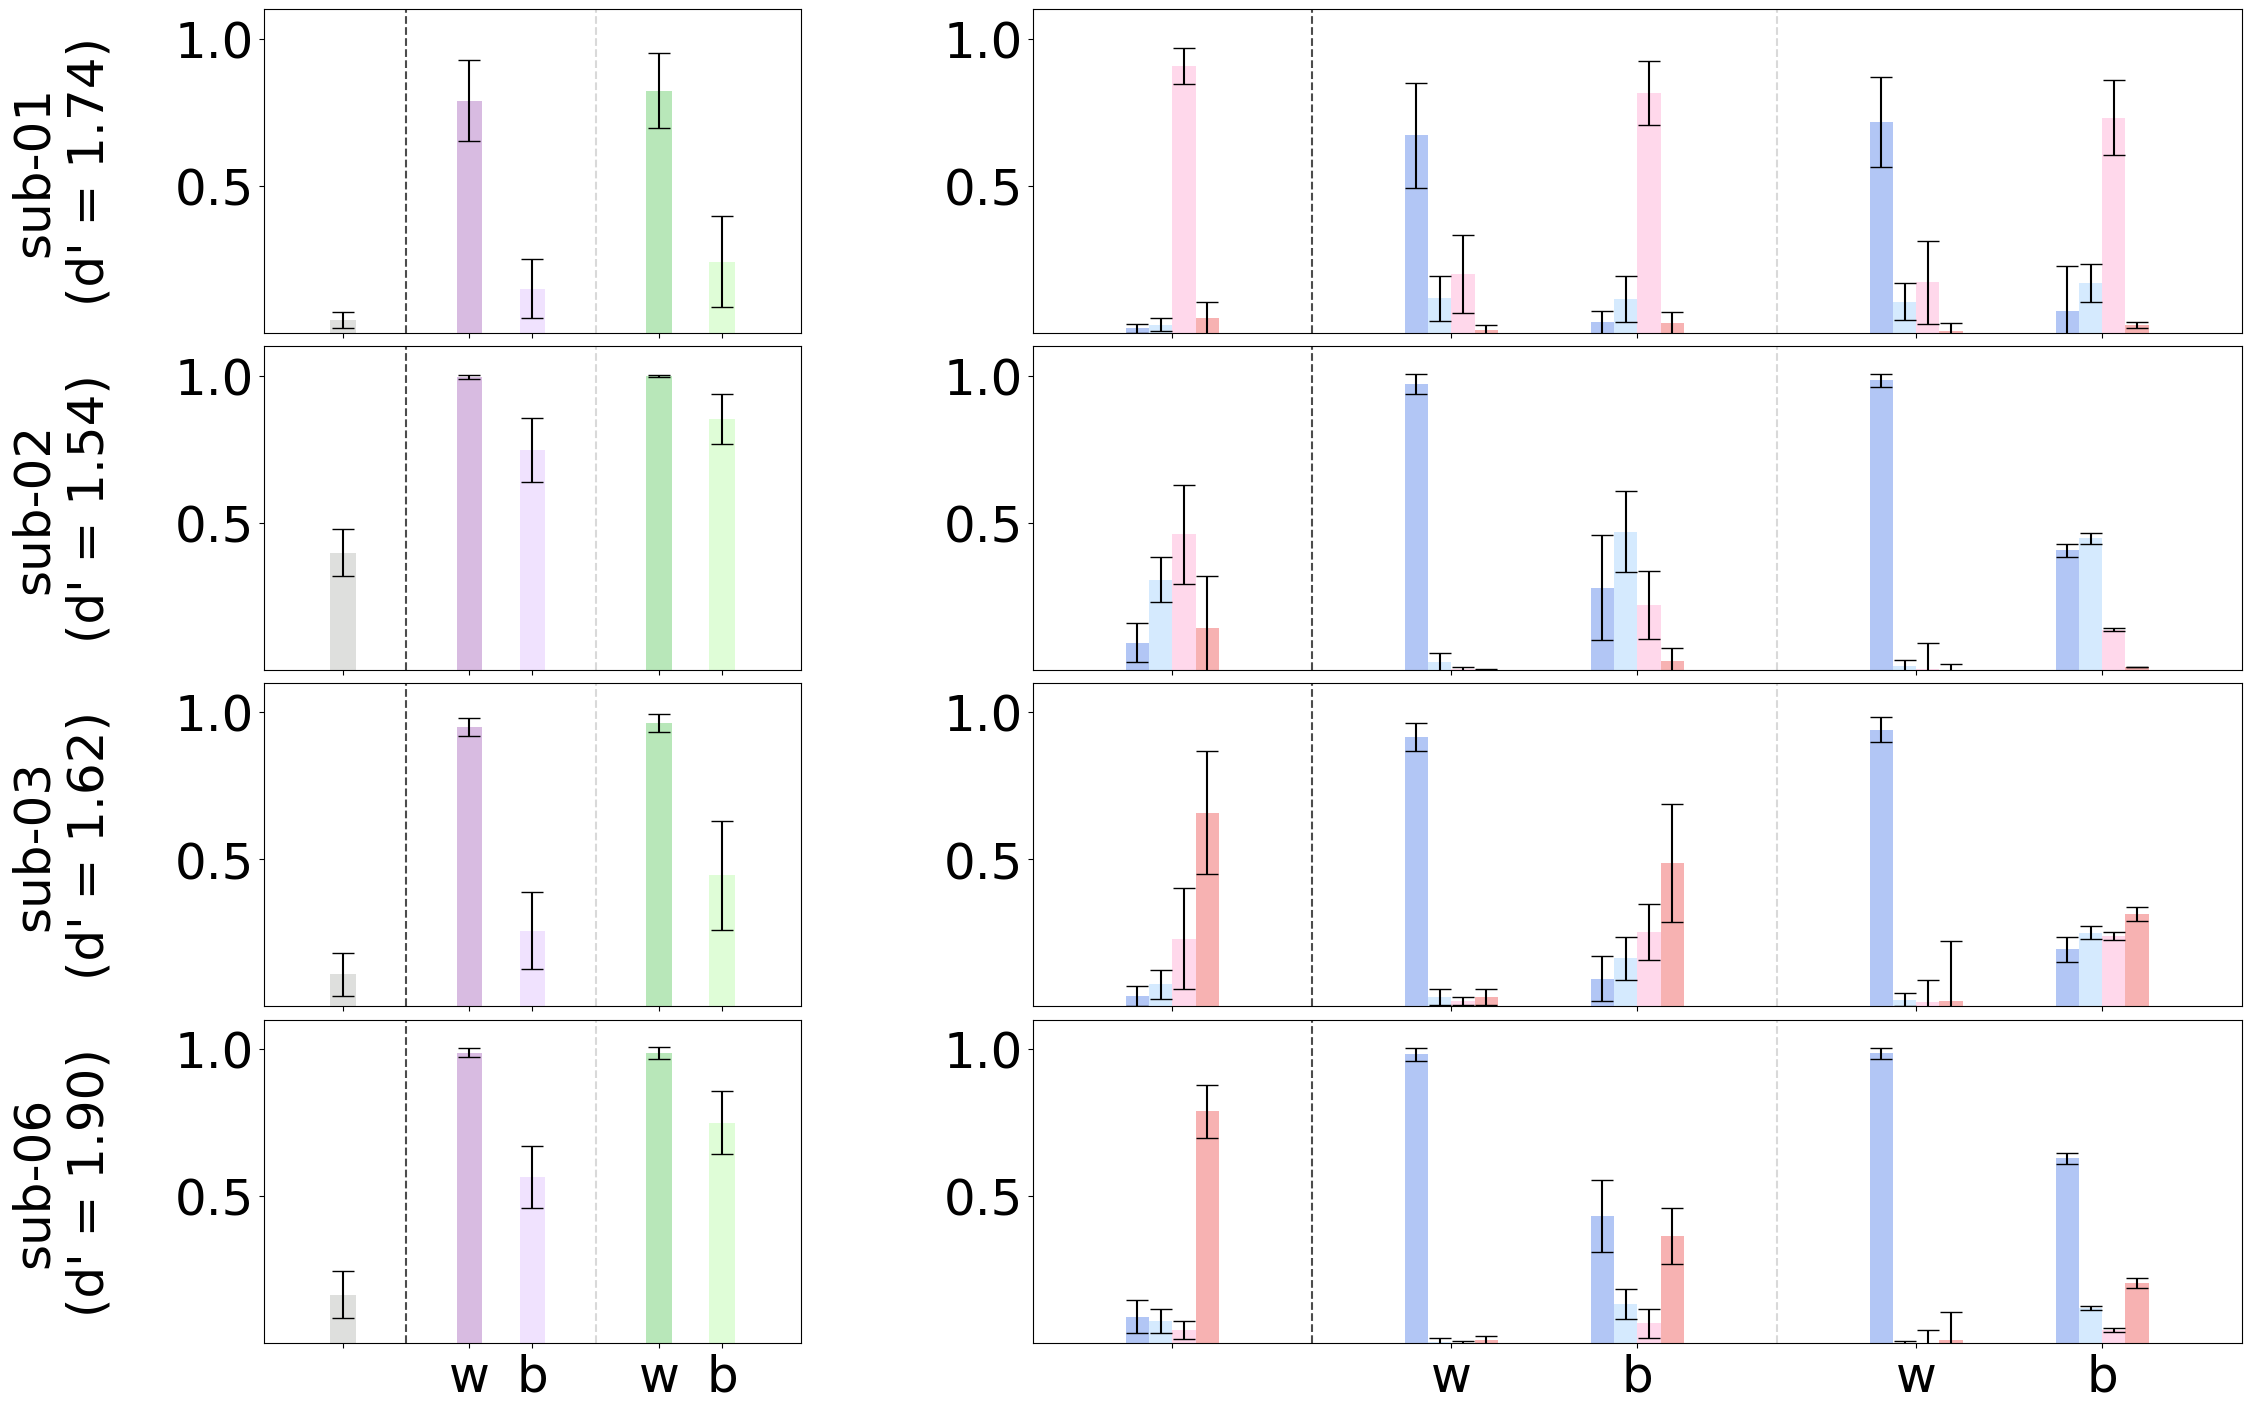

In [6]:
# Composite Figure: average counts per response type, overall and per subcondition

# concatenate metrics per session across all subjects
sess_df = None
for file in flist:
    sub_df = pd.read_csv(file, sep='\t', low_memory=False)
    sess_df = sub_df if sess_df is None else pd.concat([sess_df, sub_df], ignore_index=True)
        
SMALL_SIZE = 8
MEDIUM_SIZE = 12
BIGGER_SIZE = 36
BIGGEST_SIZE=36 

plt.rc('font', size=BIGGER_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=BIGGEST_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=BIGGEST_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGEST_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)  # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

mosaic = """
    AAAA.EEEEEEEEE
    BBBB.FFFFFFFFF
    CCCC.GGGGGGGGG
    DDDD.HHHHHHHHH
    """

fig = plt.figure(constrained_layout=True, figsize=(22.4, 3.5*4))
ax_dict = fig.subplot_mosaic(mosaic)

sub_list = np.unique(sess_df['subject_id']).tolist()
ref_list1 = ["A", "B", "C", "D"]
ref_list2 = ["E", "F", "G", "H"]
dprime = ['1.74', '1.54', '1.62', '1.90']

for i in range(len(sub_list)):
    sub = sub_list[i]
    
    # Left-hand plots
    df = sess_df[sess_df['subject_id'] == sub][['false_alarm', 'new',
                                             'hit_within', 'hit_between',
                                             'hit_within_between', 'hit_between_within',
                                             'old_within', 'old_between', 'old_within_between',
                                             'old_between_within', 
                                             'session_id']]
    
    df = df[df['session_id'] != 'ses-001']  # exclude season 1 from analyses: no between-session repeats
    sq = np.sqrt(df.shape[0]) if standard_error else 1.0
    
    ref1 = ref_list1[i]
    ref2 = ref_list2[i]
    
    fa = (df['false_alarm'] / df['new']).mean()
    hit_w = (df['hit_within'] / df['old_within']).mean()
    hit_b = (df['hit_between'] / df['old_between']).mean()
    hit_wb = (df['hit_within_between'] / df['old_within_between']).mean()
    hit_bw = (df['hit_between_within'] / df['old_between_within']).mean()

    fa_w_se = (df['false_alarm'] / df['new']).std()/sq
    hit_w_se = (df['hit_within'] / df['old_within']).std()/sq
    hit_b_se = (df['hit_between'] / df['old_between']).std()/sq
    hit_wb_se = (df['hit_within_between'] / df['old_within_between']).std()/sq
    hit_bw_se = (df['hit_between_within'] / df['old_between_within']).std()/sq
    
    w = 0.4    # bar width
    x = [1, 3, 4, 6, 7] # x-coordinates of your bars
    colors = ['xkcd:grey', 'xkcd:purple', 'xkcd:lilac', 'xkcd:green', 'xkcd:light green',]
    y = [fa, hit_w, hit_b, hit_bw, hit_wb]
    y_se = [fa_w_se, hit_w_se, hit_b_se, hit_bw_se, hit_wb_se]

    tick_label = ["", "w", "b", "w", "b"] if i ==3 else ["", "", "", "", ""]
    ax_dict[ref1].bar(x,
                     height=y,
                     capsize=8, # error bar cap width in points
                     width=w,    # bar width
                     tick_label=tick_label,
                     color = colors,
                     alpha=0.3,
                     yerr=y_se
                    )
    
    ax_dict[ref1].plot([2, 2], [0, 1.1], c='black', linestyle='dashed', alpha=0.7)
    ax_dict[ref1].plot([5, 5], [0, 1.1], c='black', linestyle='dashed', alpha=0.15)

    ax_dict[ref1].set_ylim((0, 1.1))
    ax_dict[ref1].set_xlim((-0.25, 8.25))
    ax_dict[ref1].set_yticks((0.5, 1.0))
    ax_dict[ref1].set_ylabel(f"sub-0{sub[-1]}\n(d' = {dprime[i]})\n")
    
    
    # Right-hand plots
    df = sess_df[sess_df['subject_id'] == sub][['hit_within_loConf', 'hit_within_hiConf', 
                                             'hit_between_loConf', 'hit_between_hiConf',
                                             'miss_within_loConf', 'miss_within_hiConf',
                                             'miss_between_loConf', 'miss_between_hiConf',
                                             'hit_within_between_loConf', 'hit_within_between_hiConf', 
                                             'hit_between_within_loConf', 'hit_between_within_hiConf',
                                             'miss_within_between_loConf', 'miss_within_between_hiConf',
                                             'miss_between_within_loConf', 'miss_between_within_hiConf',
                                             'CR_loConf', 'CR_hiConf',
                                             'FA_loConf', 'FA_hiConf', 
                                             'old_within', 'old_between', 
                                             'old_within_between', 'old_between_within',
                                             'new', 'session_id']]#.dropna()
    
    df = df[df['session_id'] != 'ses-001']  # exclude session 1
    sq = np.sqrt(df.shape[0]) if standard_error else 1.0
    
    hitw_lc = (df['hit_within_loConf'] / df['old_within']).mean()
    hitw_hc = (df['hit_within_hiConf'] / df['old_within']).mean()
    missw_lc = (df['miss_within_loConf'] / df['old_within']).mean()
    missw_hc = (df['miss_within_hiConf'] / df['old_within']).mean()

    hitb_lc = (df['hit_between_loConf'] / df['old_between']).mean()
    hitb_hc = (df['hit_between_hiConf'] / df['old_between']).mean()
    missb_lc = (df['miss_between_loConf'] / df['old_between']).mean()
    missb_hc = (df['miss_between_hiConf'] / df['old_between']).mean()

    
    hitwb_lc = (df['hit_within_between_loConf'] / df['old_within_between']).mean()
    hitwb_hc = (df['hit_within_between_hiConf'] / df['old_within_between']).mean()
    misswb_lc = (df['miss_within_between_loConf'] / df['old_within_between']).mean()
    misswb_hc = (df['miss_within_between_hiConf'] / df['old_within_between']).mean()

    hitbw_lc = (df['hit_between_within_loConf'] / df['old_between_within']).mean()
    hitbw_hc = (df['hit_between_within_hiConf'] / df['old_between_within']).mean()
    missbw_lc = (df['miss_between_within_loConf'] / df['old_between_within']).mean()
    missbw_hc = (df['miss_between_within_hiConf'] / df['old_between_within']).mean()
        

    cr_lc = (df['CR_loConf'] / df['new']).mean()
    cr_hc = (df['CR_hiConf'] / df['new']).mean()
    fa_lc = (df['FA_loConf'] / df['new']).mean()
    fa_hc = (df['FA_hiConf'] / df['new']).mean()

    sure_old = [fa_hc, hitw_hc, hitb_hc, hitbw_hc, hitwb_hc]
    guess_old = [fa_lc, hitw_lc, hitb_lc, hitbw_lc, hitwb_lc]
    guess_new = [cr_lc, missw_lc, missb_lc, missbw_lc, misswb_lc]
    sure_new = [cr_hc, missw_hc, missb_hc, missbw_hc, misswb_hc]

    hitw_lc_se = (df['hit_within_loConf'] / df['old_within']).std()/sq
    hitw_hc_se = (df['hit_within_hiConf'] / df['old_within']).std()/sq
    missw_lc_se = (df['miss_within_loConf'] / df['old_within']).std()/sq
    missw_hc_se = (df['miss_within_hiConf'] / df['old_within']).std()/sq

    hitb_lc_se = (df['hit_between_loConf'] / df['old_between']).std()/sq
    hitb_hc_se = (df['hit_between_hiConf'] / df['old_between']).std()/sq
    missb_lc_se = (df['miss_between_loConf'] / df['old_between']).std()/sq
    missb_hc_se = (df['miss_between_hiConf'] / df['old_between']).std()/sq

    
    hitwb_lc_se = (df['hit_within_between_loConf'] / df['old_within_between']).std()/sq
    hitwb_hc_se = (df['hit_within_between_hiConf'] / df['old_within_between']).std()/sq
    misswb_lc_se = (df['miss_within_between_loConf'] / df['old_within_between']).std()/sq
    misswb_hc_se = (df['miss_within_between_hiConf'] / df['old_within_between']).std()/sq

    hitbw_lc_se = (df['hit_between_within_loConf'] / df['old_between_within']).std()/sq
    hitbw_hc_se = (df['hit_between_within_hiConf'] / df['old_between_within']).std()/sq
    missbw_lc_se = (df['miss_between_within_loConf'] / df['old_between_within']).std()/sq
    missbw_hc_se = (df['miss_between_within_hiConf'] / df['old_between_within']).std()/sq
        
    
    cr_lc_se = (df['CR_loConf'] / df['new']).std()/sq
    cr_hc_se = (df['CR_hiConf'] / df['new']).std()/sq
    fa_lc_se = (df['FA_loConf'] / df['new']).std()/sq
    fa_hc_se = (df['FA_hiConf'] / df['new']).std()/sq

    sure_old_se = [fa_hc_se, hitw_hc_se, hitb_hc_se, hitbw_hc_se, hitbw_hc_se]
    guess_old_se = [fa_lc_se, hitw_lc_se, hitb_lc_se, hitbw_lc_se, hitbw_lc_se]
    guess_new_se = [cr_lc_se, missw_lc_se, missb_lc_se, misswb_lc_se, missbw_lc_se]
    sure_new_se = [cr_hc_se, missw_hc_se, missb_hc_se, misswb_hc_se, missbw_hc_se]
    

    X = np.array([1, 2.5, 3.5, 5, 6])
    capsize=8
    
    ax_dict[ref2].bar(X + -0.1875, sure_old, capsize=capsize, color = 'xkcd:blue', alpha=0.3,
                      yerr=sure_old_se, width = 0.125, label = '"Seen" HC')
    ax_dict[ref2].bar(X + -0.0625, guess_old, capsize=capsize, color = 'xkcd:sky blue', alpha=0.3,
                      yerr=guess_old_se, width = 0.125, label = '"Seen" LC')
    ax_dict[ref2].bar(X + 0.0625, guess_new, capsize=capsize, color = 'xkcd:pink', alpha=0.3, 
                      yerr=guess_new_se, width = 0.125, label = '"Unseen" LC')
    ax_dict[ref2].bar(X + 0.1875, sure_new, capsize=capsize, color = 'xkcd:red', alpha=0.3, 
                      yerr=sure_new_se, width = 0.125, label = '"Unseen" HC')
    
    ax_dict[ref2].plot([1.75, 1.75], [0, 1.1], c='black', linestyle='dashed', alpha=0.7)
    ax_dict[ref2].plot([4.25, 4.25], [0, 1.1], c='black', linestyle='dashed', alpha=0.15)
    
    ax_dict[ref2].set_ylim((0, 1.1))
    ax_dict[ref2].set_xlim((0.25, 6.75))
    ax_dict[ref2].set_yticks((0.5, 1.0))
    
    ax_dict[ref2].set_xticks(X)
    tick_label = ["", "w", "b", "w", "b"] if i ==3 else ["", "", "", "", ""]
    ax_dict[ref2].set_xticklabels(tick_label)
    
    
if fig_save:
    plt.savefig(f'{fig_save_path}/Figure3_Hit_Miss_FA_CR_counts.png', dpi=600)
plt.show()



---
# 4 | Reaction Time (Figure 4a)

**Fig. 4a** features reaction time (in seconds) per response type averaged across sessions for each subject. Reaction time is shown for hits, misses, correct rejections (CR) and false alarms (FA). Hit and Miss reaction times are shown separately for within-session (pale) and between-session (dark) repetitions. Error bars represent the standard deviation.

**Input files**: 
* ***cneuromod-things/THINGS/behaviour/sub-{s}/beh/sub-{s}_task-things_desc-perSession_beh.tsv***

By default, metrics of performance are derived from the **first key press** (subject response) logged for a given trial. To plot performance metrics based on the **last logged key press** (to account for self-correction), use these **input files** instead and set the **selfcorr** variable to True: 
* ***cneuromod-things/THINGS/behaviour/sub-{s}/beh/sub-{s}_task-things_desc-perSessionLKP_beh.tsv***


### 4.1 | Set paths and variables


In [7]:
# concatenate metrics per session across all subjects

# set save_fig to True to export .png file of Fig 4a
save_fig = False

# error bars are standard deviation if standard_error == False, standard error of the mean if True
standard_error = False  

# Resolve relative input and output paths
beh_file_path = Path("../../THINGS/behaviour").resolve()
fig_save_path = Path("../figures").resolve()

# Set selfcorr to True to plot performance metrics based on the LAST logged button press
# By default, performance metrics are derived from the FIRST logged button press
selfcorr = False
if selfcorr:
    flist = sorted(glob.glob(f"{beh_file_path}/sub-*/beh/sub-0*_task-things_desc-perSessionLKP_beh.tsv"))
else:
    flist = sorted(glob.glob(f"{beh_file_path}/sub-*/beh/sub-0*_task-things_desc-perSession_beh.tsv"))
    

### 4.2 | Run the code below to generate Fig. 4a


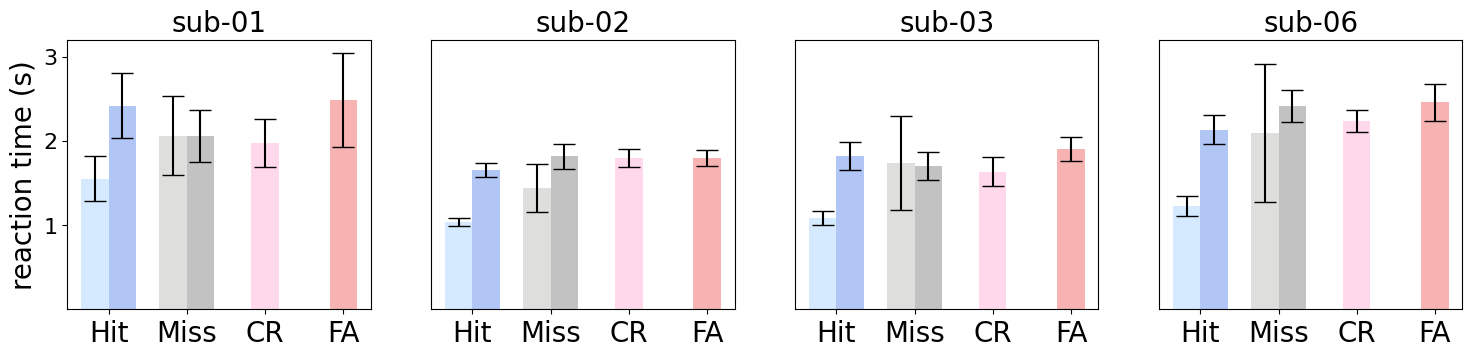

In [8]:
# responses split for within- and between-session repetitions for Hits and Misses

sess_df = None
for file in flist:
    sub_df = pd.read_csv(file, sep='\t', low_memory=False)
    sess_df = sub_df if sess_df is None else pd.concat([sess_df, sub_df], ignore_index=True)

SMALL_SIZE = 8
MEDIUM_SIZE = 12
BIGGER_SIZE = 16
BIGGEST_SIZE=20 

plt.rc('font', size=BIGGER_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=BIGGEST_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=BIGGEST_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGEST_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)  # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


fig, axes = plt.subplots(1, 4, figsize=(18, 3.5))

sub_list = sorted(np.unique(sess_df['subject_id']).tolist())

for i in range(len(sub_list)):
    sub = sub_list[i]
    df = sess_df[sess_df['subject_id'] == sub][
        ['rt_hit_within', 'rt_hit_between', 'rt_miss_within', 'rt_miss_between', 'rt_CR', 'rt_FA', 'session_id']
        #['rt_hit', 'rt_miss', 'rt_CR', 'rt_FA', 'session_id']
    ]
    df = df[df['session_id'] != 'ses-001']  # exclude session 1
    sq = np.sqrt(df.shape[0]) if standard_error else 1.0
    
    hit_w_rt = df['rt_hit_within'].dropna().mean()
    hit_b_rt = df['rt_hit_between'].dropna().mean()
    miss_w_rt = df['rt_miss_within'].dropna().mean()
    miss_b_rt = df['rt_miss_between'].dropna().mean()
    CR_rt = df['rt_CR'].dropna().mean()
    FA_rt = df['rt_FA'].dropna().mean()

    hit_w_se = df['rt_hit_within'].dropna().std()/sq
    hit_b_se = df['rt_hit_between'].dropna().std()/sq
    miss_w_se = df['rt_miss_within'].dropna().std()/sq
    miss_b_se = df['rt_miss_between'].dropna().std()/sq
    CR_se = df['rt_CR'].dropna().std()/sq
    FA_se = df['rt_FA'].dropna().std()/sq
    
    w = 0.35    # bar width
    x = [1-(w/2), 1+(w/2), 2-(w/2), 2+(w/2), 3, 4] # x-coordinates of your bars
    colors = ['xkcd:sky blue', 'xkcd:blue', 'xkcd:grey', 'xkcd:dark grey', 'xkcd:pink', 'xkcd:red',]
    y = [hit_w_rt, hit_b_rt, miss_w_rt, miss_b_rt, CR_rt, FA_rt]
    y_se = [hit_w_se, hit_b_se, miss_w_se, miss_b_se, CR_se, FA_se]
    
    axes[i].bar(x,
                height=y,
                capsize=8, # error bar cap width in points
                width=w,    # bar width
                color = colors,
                alpha=0.3,
                yerr=y_se
               )

    axes[i].set_xticks([1.0, 2.0, 3.0, 4.0], ["Hit", "Miss", "CR", "FA"])    
    axes[i].set_ylim((0, 3.2))
    if i == 0:
        axes[i].set_yticks((1.0, 2.0, 3.0))
        axes[i].set_ylabel('reaction time (s)')
    else:
        axes[i].set_yticks([])
        axes[i].set_ylabel('')        

    axes[i].set_title(f'sub-0{sub[-1]}')
             
if save_fig:
    plt.savefig(f'{fig_save_path}/FigureS1_reaction_times_per_responsetype.png', dpi=600)
plt.show()


### 4.3 | Run the code below to generate an alternative version of Fig. 4a

Variation: responses are collapsed for all Hit and Miss responses (images repeated within and between sessions)

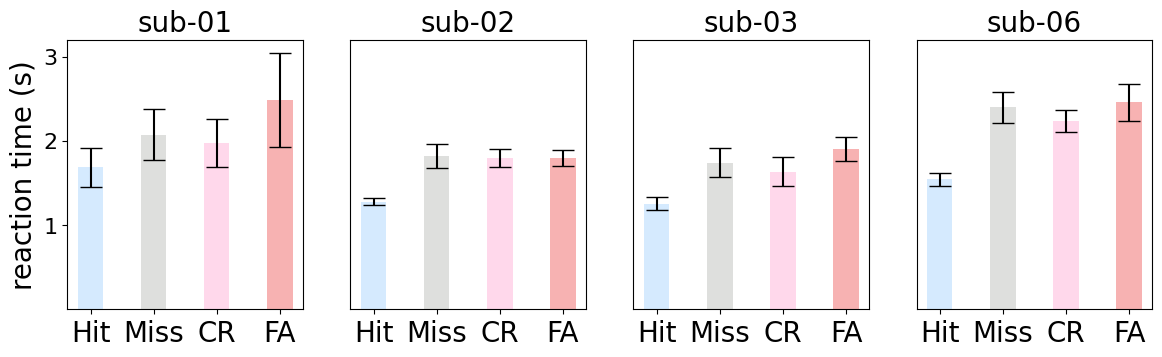

In [9]:
# Responses collapsed for all Hit and Miss responses

# set to True to export .png file
save_fig = False
standard_error = False  # error bars are standard deviation if False, standard error of the mean if True

SMALL_SIZE = 8
MEDIUM_SIZE = 12
BIGGER_SIZE = 16
BIGGEST_SIZE=20 

plt.rc('font', size=BIGGER_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=BIGGEST_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=BIGGEST_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGEST_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)  # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


fig, axes = plt.subplots(1, 4, figsize=(14, 3.5))

sub_list = sorted(np.unique(sess_df['subject_id']).tolist())

for i in range(len(sub_list)):
    sub = sub_list[i]
    df = sess_df[sess_df['subject_id'] == sub][['rt_hit', 'rt_miss', 'rt_CR', 'rt_FA', 'session_id']]
    df = df[df['session_id'] != 'ses-001']  # exclude session 1
    sq = np.sqrt(df.shape[0]) if standard_error else 1.0
    
    hit_rt = df['rt_hit'].dropna().mean()
    miss_rt = df['rt_miss'].dropna().mean()
    CR_rt = df['rt_CR'].dropna().mean()
    FA_rt = df['rt_FA'].dropna().mean()

    hit_se = df['rt_hit'].dropna().std()/sq
    miss_se = df['rt_miss'].dropna().std()/sq
    CR_se = df['rt_CR'].dropna().std()/sq
    FA_se = df['rt_FA'].dropna().std()/sq
    
    w = 0.4    # bar width
    x = [1, 2, 3, 4] # x-coordinates of your bars
    colors = ['xkcd:sky blue', 'xkcd:grey', 'xkcd:pink', 'xkcd:red',]
    y = [hit_rt, miss_rt, CR_rt, FA_rt]
    y_se = [hit_se, miss_se, CR_se, FA_se]

    axes[i].bar(x,
                height=y,
                capsize=8, # error bar cap width in points
                width=w,    # bar width
                tick_label=["Hit", "Miss", "CR", "FA"],
                color = colors,
                alpha=0.3,
                yerr=y_se
               )
                  
    axes[i].set_ylim((0, 3.2))
    if i == 0:
        axes[i].set_yticks((1.0, 2.0, 3.0))
        axes[i].set_ylabel('reaction time (s)')
    else:
        axes[i].set_yticks([])
        axes[i].set_ylabel('')        

    axes[i].set_title(f'sub-0{sub[-1]}')
             
if save_fig:
    plt.savefig(f'{fig_save_path}/FigureS1_reaction_times_per_responsetype.png', dpi=600)
plt.show()
